# Lógica para Computação: Tableau Analítico - Lógica Proposicional
> *Autor: Davi Romero de Vasconcelos, daviromero@ufc.br, Universidade Federal do Ceará, Campus de Quixadá, Maio de 2022*.
> *(Última atualização 26/05/2022)*

Este material foi preparado para a disciplina de Lógica para Computação com a finalidade de apresentar os conceitos básicos do sistema de Tableau Analítico. 






       

In [ ]:
#@title Implementação em Python do ANITA (ANalytIc Tableau proof Assistant)
#@markdown > **Importante:** 
#@markdown - Os átomos são escritos em letras maiúsculas (e.g. `A`, `B`, `C`).
#@markdown - Os símbolos de $\bot,\vdash$ e os conectivos $\lnot,\land,\lor,\rightarrow$ são escritos por `@`,`|-`,`~`, `&`, `|`, `->` respectivamente.
#@markdown - A ordem de precedência dos quantificadores e dos conectivos lógicos é definida por $\lnot,\land,\lor,\rightarrow$ com alinhamento à direita. Por exemplo:
#@markdown   - A fórmula `~A&B->C` representa a fórmula $(((\lnot A)\land B)\rightarrow C)$.
#@markdown   - O teorema `A, A->B, B->C |- C` representa o teorma $A,~(A\rightarrow B),~(B\rightarrow C)\vdash C$.
#@markdown - As palavras *Premissa*, *Conclusão* e *Fechado* são representadas por `pre`, `conclusao` e `fechado`, respectivamente. Opcionalmente, os nomes das regras podem ser omitidos.
#@markdown >
#@markdown > Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir suas próprias demonstrações.
#@markdown > 
#@markdown >*Execute esta célula (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*

#!pip install anita -q
!pip install git+https://github.com/daviromero/anita.git -q
#!pip install logic4py -q
!pip install git+https://github.com/daviromero/logic4py.git -q
from anita.anita_pt_gui import anita, anita_theorem
from logic4py.logic_gui import verify_formula
from logic4py.example_theorems import THEOREMS as lTheorems
from logic4py.examples_gui import verify_reasoning_q1, verify_reasoning_q2, verify_reasoning_q3, verify_reasoning_q4, verify_reasoning_q5, verify_reasoning_q6, verify_reasoning_q7, verify_reasoning_q8, verify_reasoning_q9, verify_reasoning_q10, verify_reasoning_q11, verify_reasoning_q12
from random import randrange


In [ ]:
#@title Exemplo: Caso tenha dúvidas sobre a ordem de precedência, escreva uma fórmula da Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_formula('~A&B->C')

# [Sistema de Tableau Analítico](https://youtu.be/--EkNj3GQI0)

Os sistemas Axiomático e Dedução Natural permitem demonstrar quando uma fórmula é derivada de um conjunto de fórmulas ($\Gamma\vdash\varphi$). Contudo, nenhum desses métodos nos permite inferir que $\Gamma\not\vdash\varphi$. 
Note que $\Gamma\not\vdash\varphi$ não implica em $\Gamma\vdash\lnot\varphi$. 


O método da Tabela da Verdade é um procedimento de decisão que nos permite demonstrar se $\Gamma\vdash\varphi$ ou $\Gamma\not\vdash\varphi$. Contudo, esse procedimento tem um crescimento no número de linhas exponencial em relação ao número de símbolos proposicionais. O sistema de inferência de **Tableau Analítico (Semântico)** é um método de decisão que não necessariamente gera provas de tamanho exponencial.

O Sistema Tableau é um método de inferência baseado em *refutação*: para provarmos $\Gamma\vdash\varphi$, afirmamos a *veracidade* de $\Gamma$ e a *falsidade* de $\varphi$, na esperança de derivarmos uma *contradição*.  Por outro lado, se não for obtida uma contradição, então teremos construído um *contra-exemplo*, i.e., uma valoração que satisfaz $\Gamma$ e não satisfaz $\varphi$. Para afirmar a veracidade ou falsidade de uma fórmula, o método dos tableaux analíticos marca as fórmulas com os símbolos $T$ para verdade e $F$ para falsidade. 

O passo inicial na criação de um tableau é marcar todas as fórmulas de $\Gamma$ com $T$ e a fórmula $\varphi$ com $F$. A partir do tableau inicial, utiliza-se regras de expansão do tableau que adicionam novas fórmulas ao final de um ramo (regras do tipo $\alpha$) ou que bifurcam um ramo em dois (regras do tipo $\beta$).
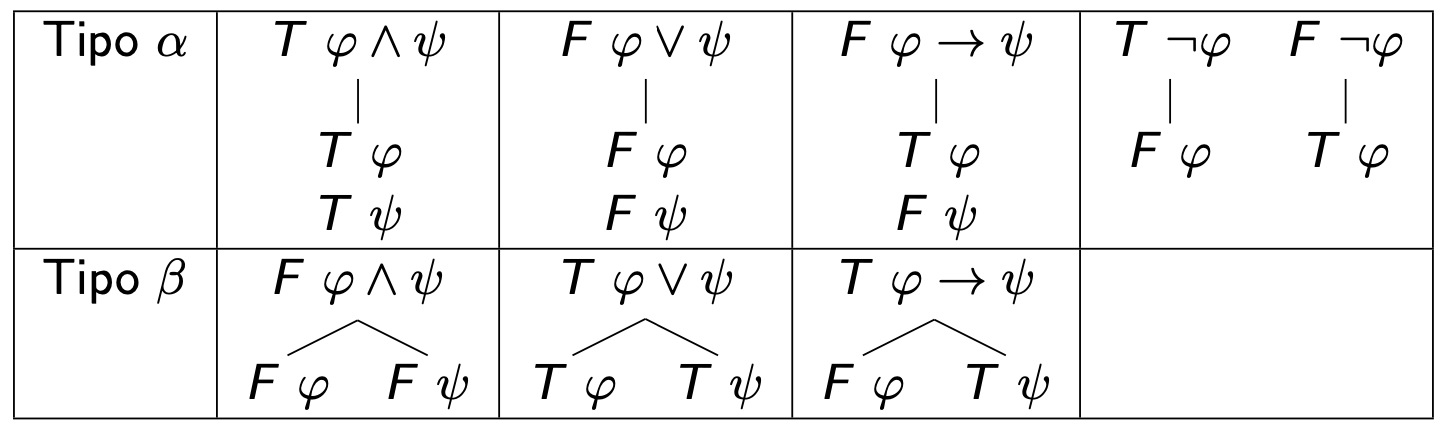

As regras de derivação são aplicadas considerando que:
- Uma **fórmula** só pode ser expandida uma **única vez por ramo**.
- Um **ramo é saturado** se não possui mais fórmulas para expandir.
- Um **ramo é fechado** se possui uma par de fórmulas $T~\varphi$ e $F~\varphi$. Um ramo fechado não precisa mais ser expandido.
- Um **tableau é fechado** se todos os seus ramos são fechados. Neste caso, temos que $\Gamma\vdash\varphi$.
- Um **ramo saturado e não fechado** demonstra que $\Gamma\not\vdash\varphi$, na qual podemos extrair um **contra-exemplo**, na qual identificamos os rótulos de todos os átomos com seus respectivos valores-verdade.


Abaixo, apresentamos três exemplos de demonstrações em Tableau Analítico.
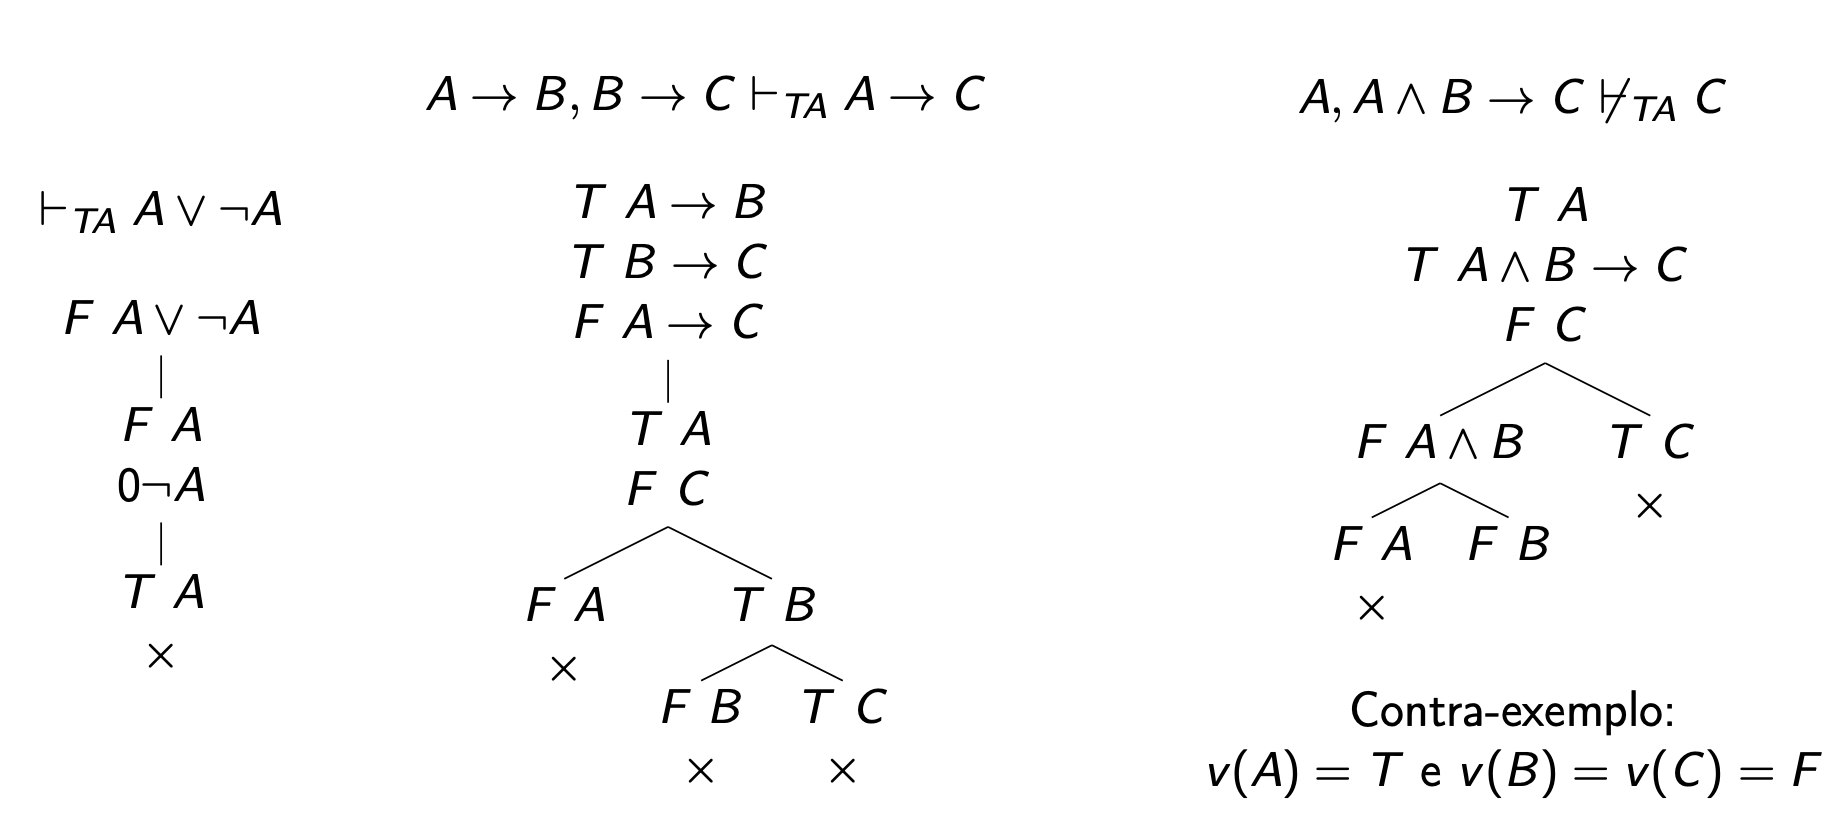

## Tableau Analítico no Estilo de Fitch

Para facilitar a compreensão dos estudantes, propomos escrever as demonstrações em Tableau Analítico por meio sequencial de modo semelhante ao Estilo de Fitch de Dedução Natural. A seguir iremos apresentar as regras de Tableau neste estilo.


O primeiro passo em uma demonstração $\varphi_1,\varphi_2,\ldots,\varphi_n\vdash\psi$ em Tableau é definir o Tableau Inicial. A Figura abaixo apresenta a representação geral desta definição, na qual:
- As premissas $\varphi_1,\varphi_2,\ldots,\varphi_n$ são representadas em uma linha cada, seguindo uma numeração sequencial, rotulado como $T$ (*True*) e como justificativa "Premissa"
- A conclusão $\psi$ é definida na linha posterior a última premissa, rotulada por $F$ (*False*) e com a justificativa "Conclusão". 

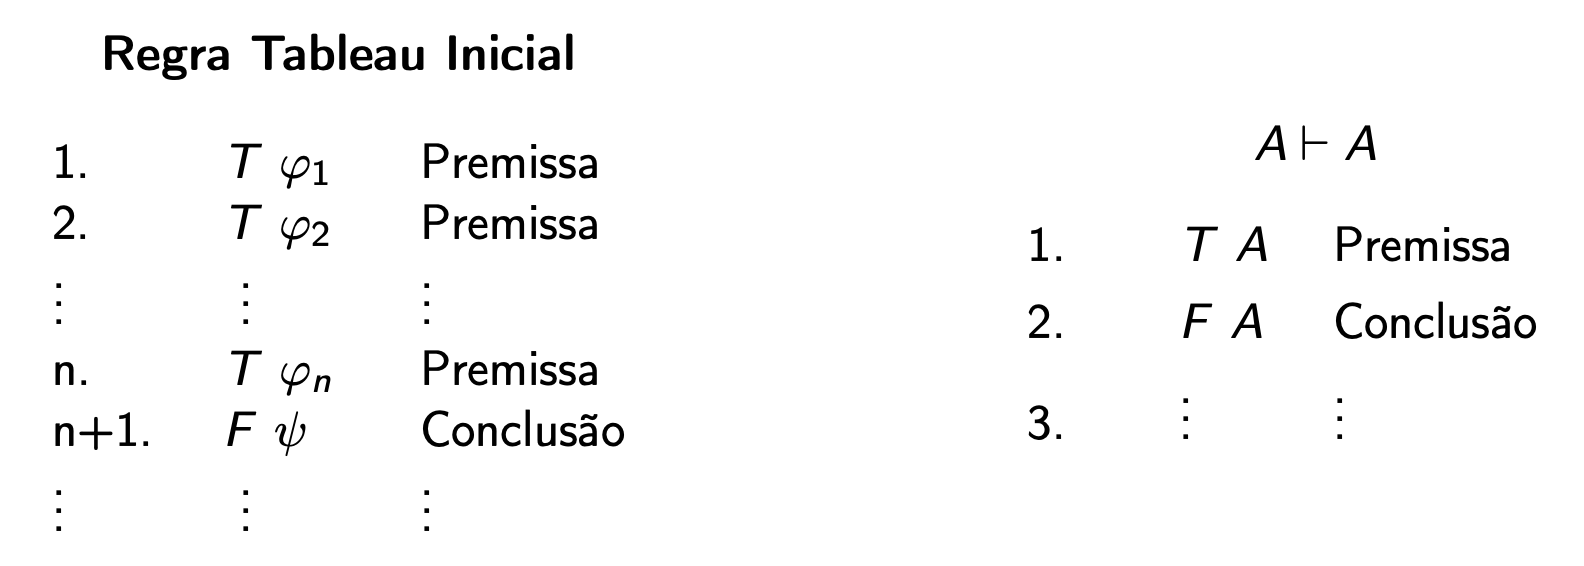

## Regra Ramo Fechado
Dizemos que um **ramo está fechado** (contém uma contradição $\bot$) em uma linha $p$ se uma fórmula $\varphi$ está rotulada em uma linha $m$ com $T$ e em outra linha $n$ com $F$ (ambas anteriores a $p$). Um ramo fechado não pode mais ser expandido. Na Figura abaixo apresentamos o esquema geral desta regra, bem como o exemplo da demonstração de $A\vdash A$, na qual fechamos o (único) ramo na linha $3$ a partir da fórmula $A$ referenciada nas linhas $1$ e $2$ como $T$ e $F$, respectivamente.

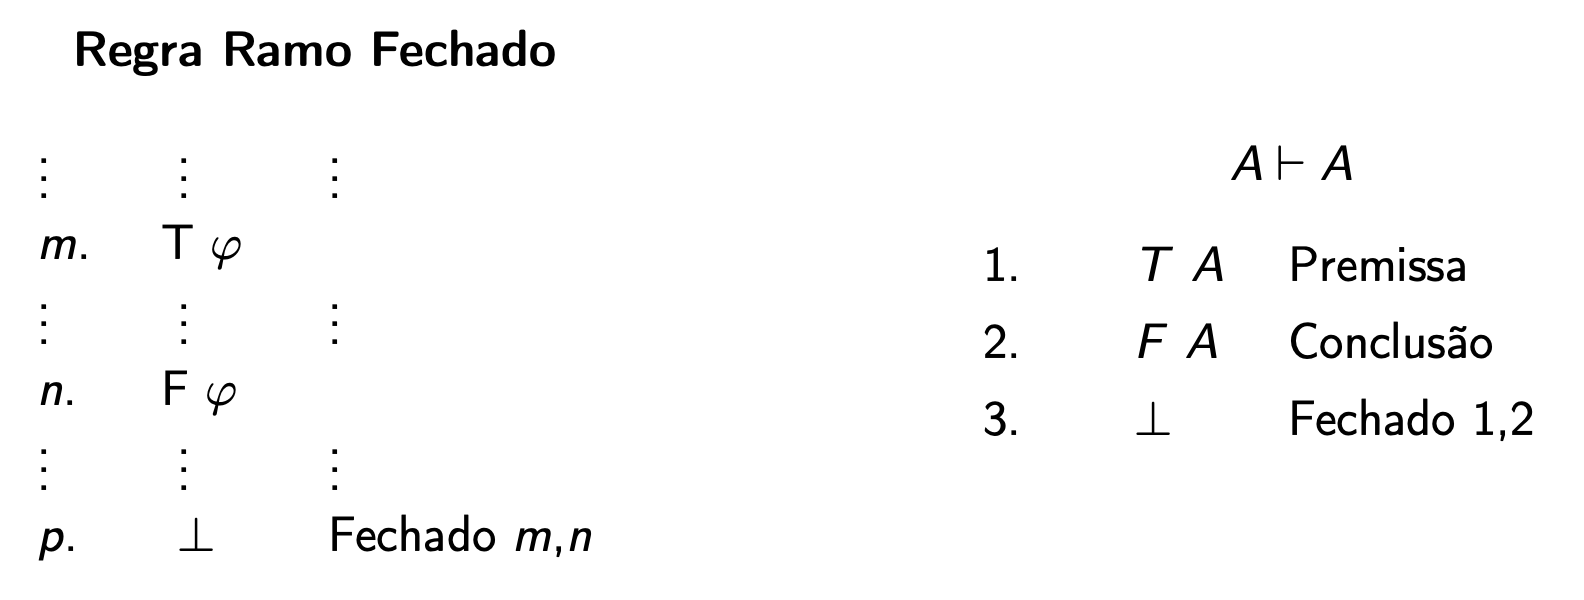

In [ ]:
#@title ANITA - Exemplo: $A\vdash A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A    pre
2. F A    conclusao
3. @      fechado 1,2''',height_layout='60px')

## Regra Negação

A **regra da negação $\lnot T$** é apresentada na Figura abaixo, na qual a fórmula $\varphi$ marcada com $F$ pode ser concluída na linha $n$ a partir da fórmula $\lnot\varphi$ rotulada com $T$ da linha $m$. De forma análoga, a **regra da negação $\lnot F$** pode concluir $\varphi$ marcada com $T$ na linha $n$ a partir da fórmula $\lnot\varphi$ rotulada com $F$ na linha $m$. Por exemplo, na Figura abaixo, podemos concluir na $3$ $T~\lnot A$. Daí, podemos aplica a regra $\lnot T$ e concluir $F~A$ na linha $4$. Por fim, podemos fechar o ramo (com a contradição), pois temos a $T~A$ na linha $1$ e $F~A$ na linha $4$.

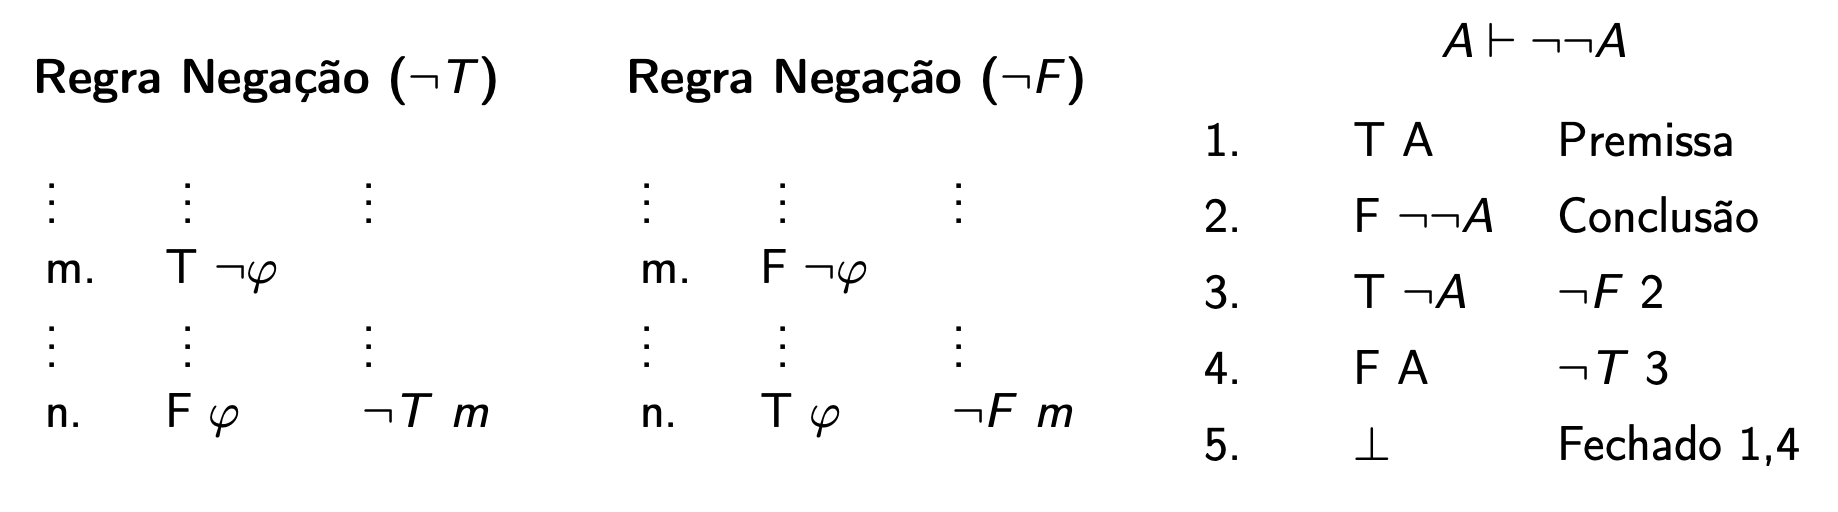

In [ ]:
#@title ANITA - Exemplo: $A\vdash \lnot \lnot A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A      pre
2. F ~~A    conclusao
3. T ~A     ~F 2
4. F A      ~T 3
5. @        fechado 1,4''', height_layout='120px')

## Regra da Conjunção $\land T$

A **regra da conjunção $\land T$** é apresentada na Figura abaixo, na qual as fórmulas $\varphi$ e $\psi$ marcadas com $T$ podem ser concluídas nas linhas $n$ e $n+1$, respectivamente, a partir da fórmula $\varphi\land\psi$ rotulada com $T$ da linha $m$. Importante notar que a regra impõe a conclusão de ambas as fórmulas $\varphi$ e $\psi$. Por exemplo, na Figura abaixo, podemos concluir $T~A$ e $T~B$, nas linhas $3$ e $4$, a partir da regra $\land T$ de $T~A\land B$ da linha $1$.

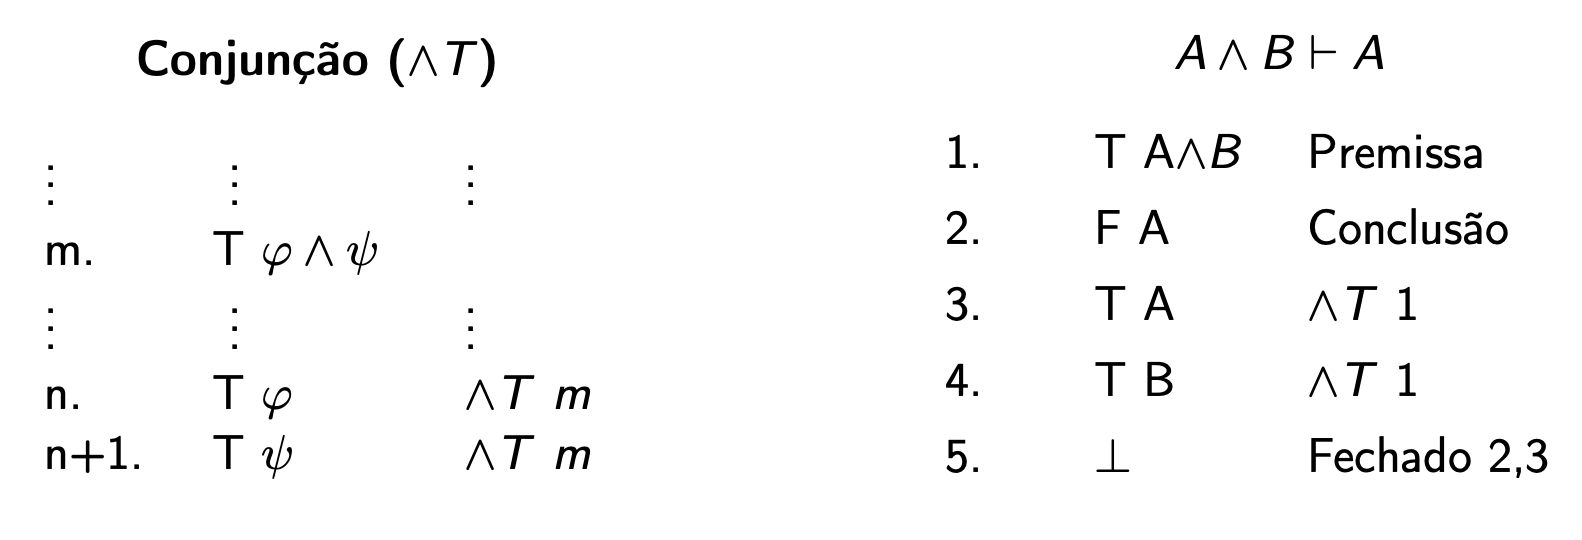

In [ ]:
#@title ANITA - Exemplo: $A\land B\vdash A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A&B    pre
2. F A      conclusao
3. T A      &T 1
4. T B      &T 1
5. @        fechado 2,3''', height_layout='120px')

## Regra da Conjunção $\land F$

A **regra da conjunção $\land F$** é apresentada na Figura abaixo, na qual $F~\varphi\land\psi$ bifurca o ramo em dois novos ramos: um que inicia na linha $n$ com $F~\varphi$; e, outro na linha $p$ com $F~\psi$. Para delimitarmos os respectivos ramos, usamos os símbolos $\{$ e $\}$. Por exemplo, na Figura abaixo, aplicando a regra $\land F$ na linha $3$ com $F~A\wedge B$, bifurcamos este ramo:
1. No ramo que inicia na linha $4$ com $F~A$ que é utilizado com $T~A$ da linha $1$ para fechar este ramo na linha $5$.
1. No ramo que inicia na linha $6$ com $F~B$ que é utilizado com $T~B$ da linha $2$ para fechar este ramo na linha $7$. 

Importante notar que só podemos referenciar as fórmulas demonstradas no mesmo ramo. Assim, por exemplo, a fórmula $F~A$ da linha $4$ não poderia ser referenciada no ramo que inicia na linha $6$.

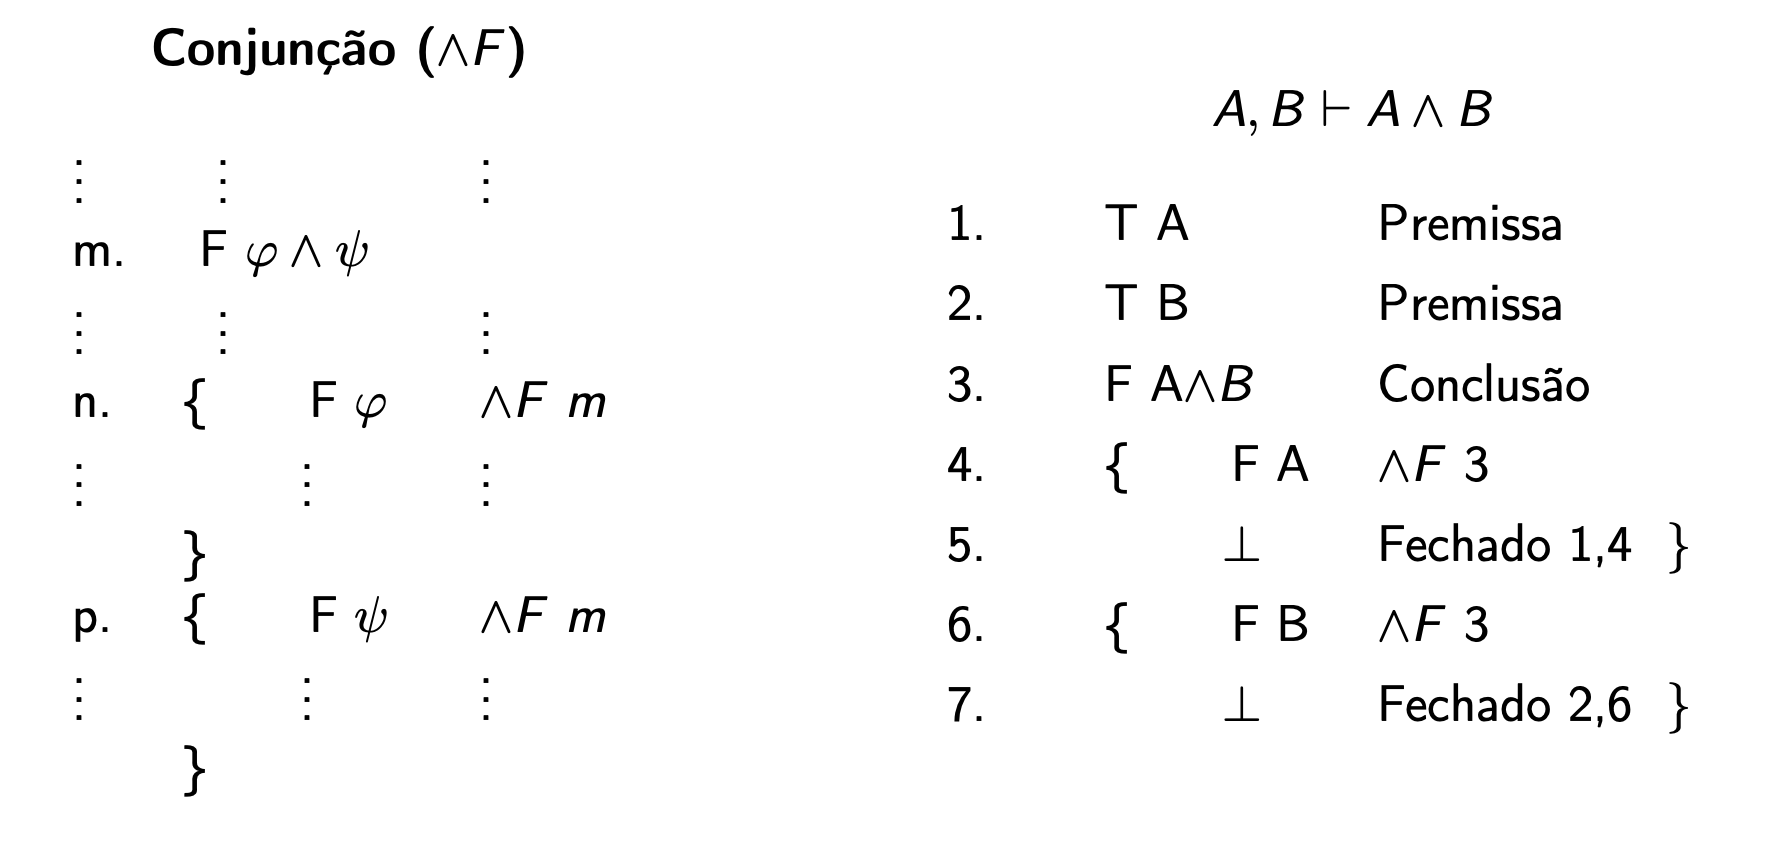

In [ ]:
#@title ANITA - Exemplo: $A,B\vdash A\land B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A         pre
2. T B         pre
3. F A&B       conclusao
4. {  F A      &F 3
5.    @        fechado 1,4
   }
6. {  F B      &F 3
7.    @        fechado 2,6
   }''', height_layout='150px')

## Regra da Disjunção $\lor T$

A **regra da disjunção $\lor T$** é apresentada na Figura abaixo, na qual $T~\varphi\lor\psi$ bifurca o ramo em dois novos ramos: um que inicia na linha $n$ com $T~\varphi$; e, outro na linha $p$ com $T~\psi$. Por exemplo, na Figura abaixo, aplicando a regra $\lor T$ na linha $1$ com $T~A\lor B$, bifurcamos este ramo a partir da linha $4$:
1. No ramo que inicia na linha $5$ com $T~A$ que é utilizado com $F~A$ da linha $3$ para fechar este ramo na linha $6$.
1. No ramo que inicia na linha $7$ com $T~B$ que é utilizado com $F~B$ da linha $4$ para fechar este ramo na linha $8$. 

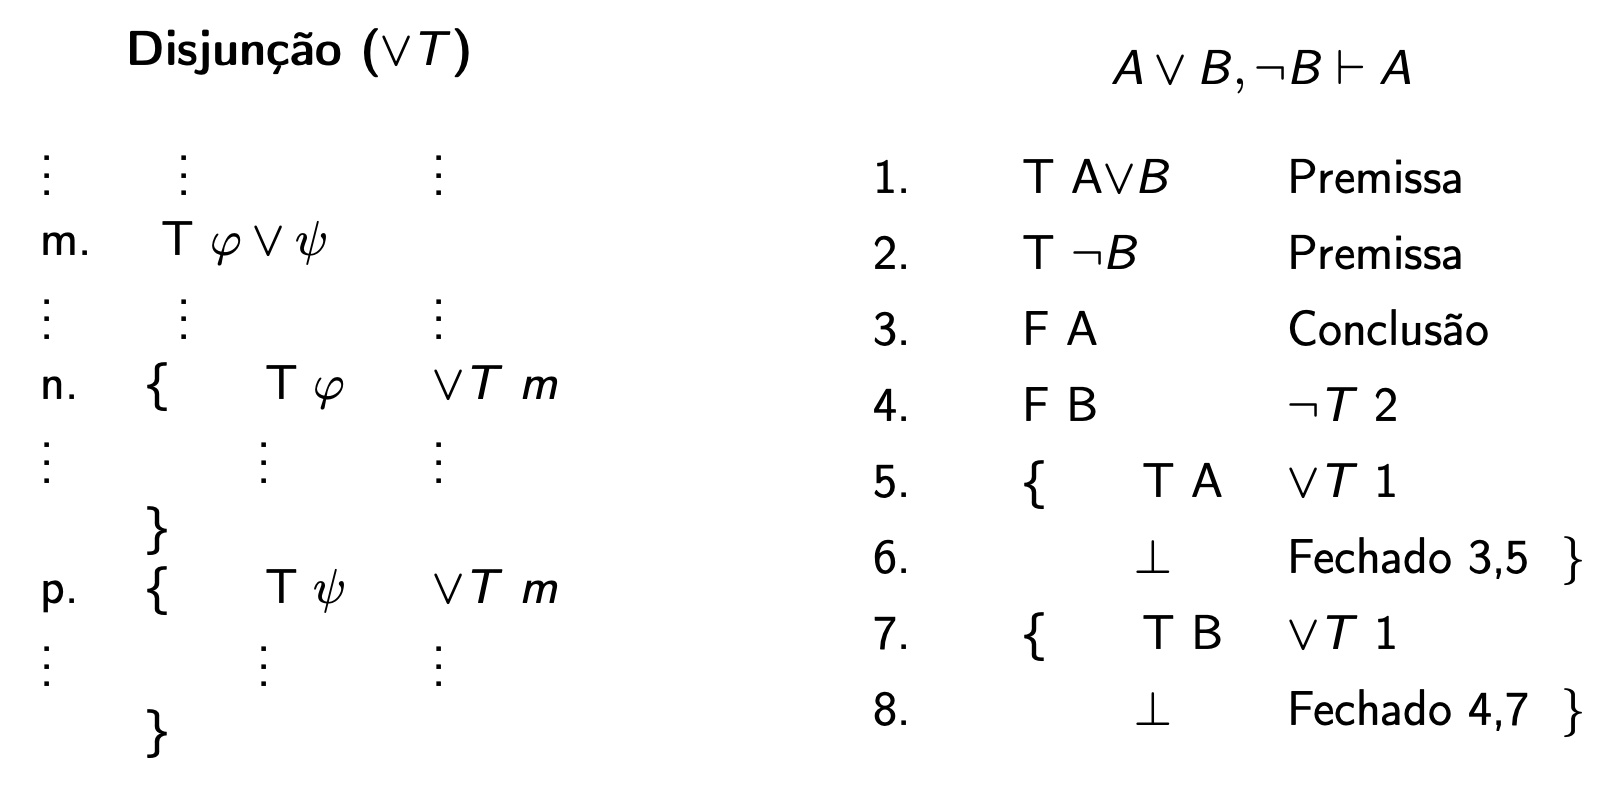

In [ ]:
#@title ANITA - Exemplo: $A\lor B,\lnot B\vdash A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A|B        pre
2. T ~B         pre
3. F A          conclusao
4. F B          ~T 2
5. {  T A       |T 1
6.    @         fechado 3,5
   }
7. {  T B       |T 1
8.    @         fechado 4,7
   }''', height_layout='200px')

## Regra da Disjunção $\lor F$

A **regra da disjunção $\lor F$** é apresentada na Figura abaixo, na qual as fórmulas $\varphi$ e $\psi$ marcadas com $F$ podem ser concluídas nas linhas $n$ e $n+1$, respectivamente, a partir da fórmula $\varphi\lor\psi$ rotulada com $F$ da linha $m$. Importante notar que a regra impõe a conclusão de ambas as fórmulas $\varphi$ e $\psi$. Por exemplo, na Figura abaixo, podemos concluir $F~A$ e $F~B$, nas linhas $3$ e $4$, respectivamente, a partir da regra $\land F$ de $F~A\lor B$ da linha $2$.

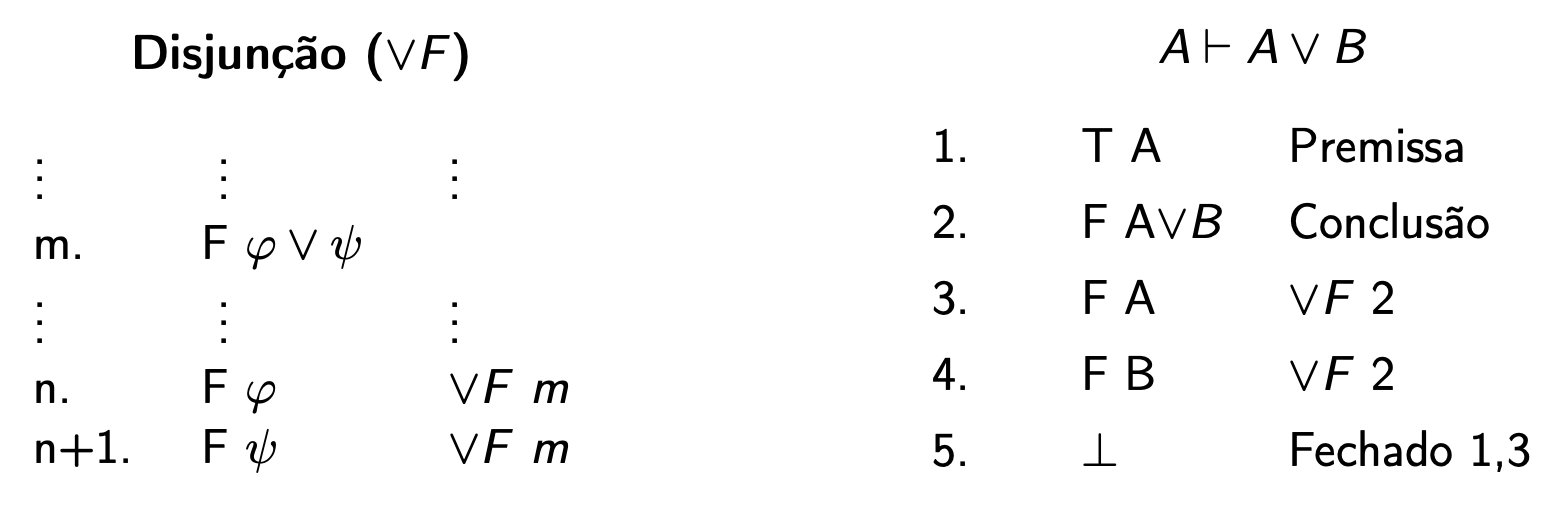

In [ ]:
#@title ANITA - Exemplo: $A\vdash A\lor B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A          pre
2. F A|B        conclusao
3. F A          |F 2
4. F B          |F 2
5. @            fechado 1,3''', height_layout='120px')

## Regra da Implicação $\rightarrow T$

A **regra da disjunção $\rightarrow T$** é apresentada na Figura abaixo, na qual $T~\varphi\rightarrow\psi$ bifurca o ramo em dois novos ramos: um que inicia na linha $n$ com $F~\varphi$; e outro na linha $p$ com $T~\psi$. Por exemplo, na Figura abaixo, aplicando a regra $\rightarrow T$ na linha $1$ com $T~\lnot A\rightarrow B$, bifurcamos este ramo a partir da linha $4$:
1. No ramo que inicia na linha $5$ com $F~\lnot A$, na qual aplicamos a regra $\lnot F$ para concluir $T~A$ na linha $6$ e, por fim, usamos $F~A$ da linha $3$ para fechar este ramo na linha $7$.
1. No ramo que inicia na linha $8$ com $T~B$ que é utilizado com $F~B$ da linha $4$ para fechar este ramo na linha $9$. 

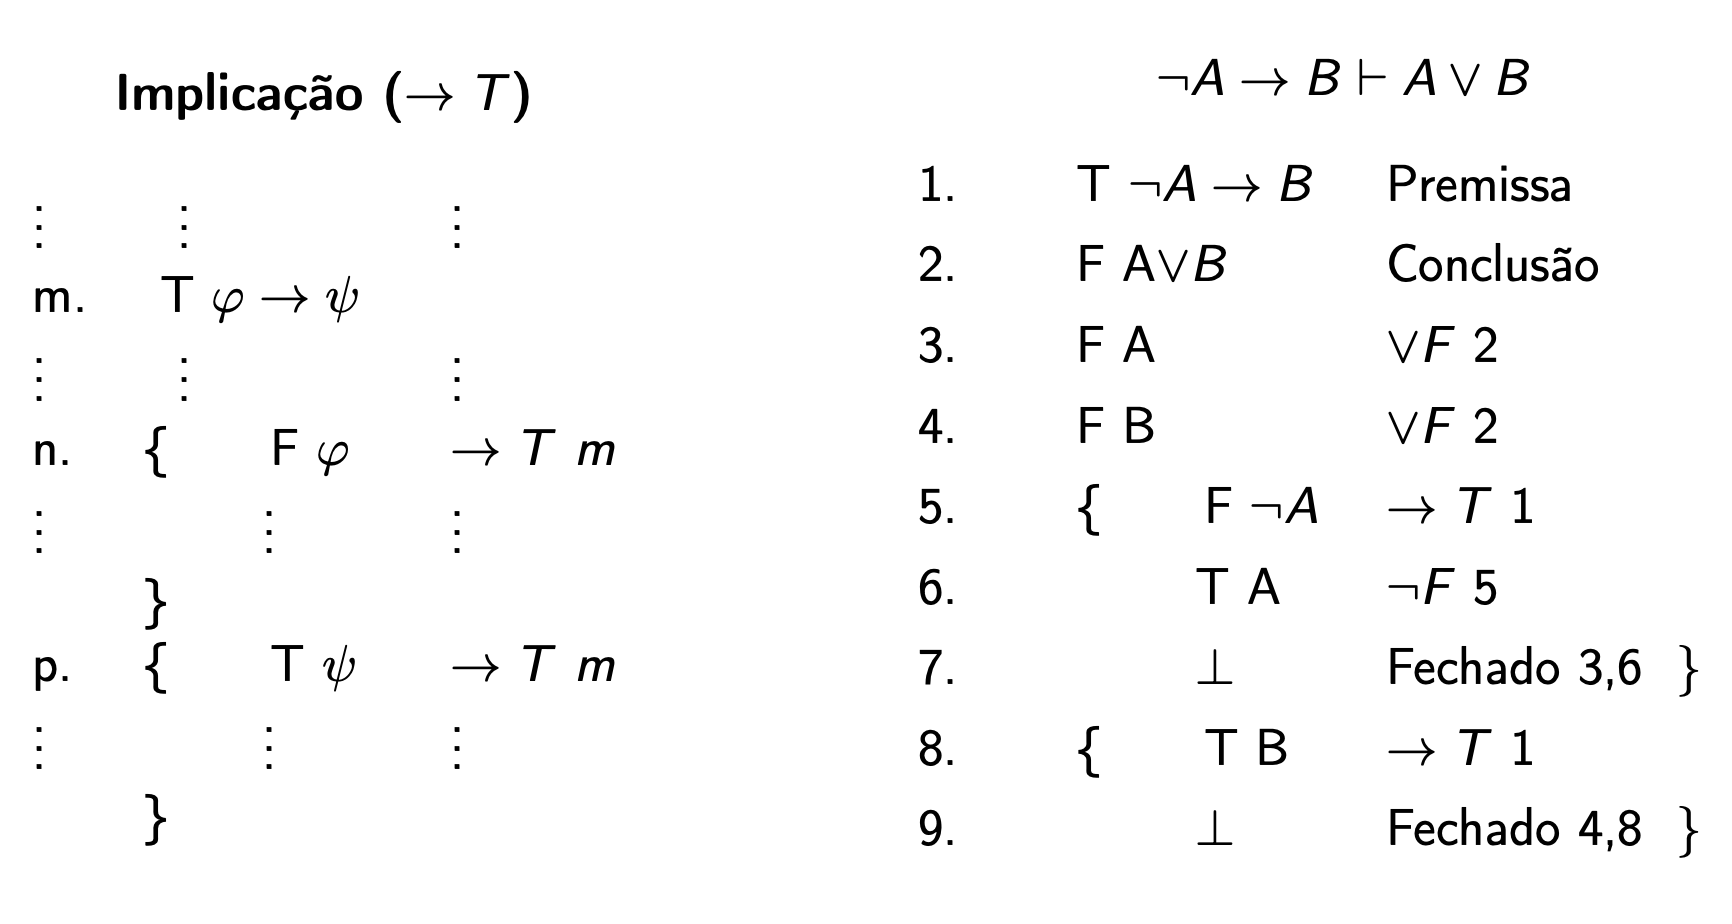

In [ ]:
#@title ANITA - Exemplo: $\lnot A\rightarrow B\vdash A\lor B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T ~A->B      pre
2. F A|B        conclusao
3. F A          |F 2
4. F B          |F 2
5. {  F ~A      ->T 1
6.    T A       ~F 5
7.    @         fechado 3,6
   }
8. {  T B       ->T 1
9.    @         fechado 4,8
   }''', height_layout='200px')

## Regra da Implicação $\rightarrow F$

A **regra da implicação $\rightarrow F$** é apresentada na Figura abaixo, na qual as fórmulas $\varphi$ e $\psi$ marcadas com $T$ e $F$, respectivamente, podem ser concluídas nas linhas $n$ e $n+1$, respectivamente, a partir da fórmula $\varphi\rightarrow\psi$ rotulada com $F$ da linha $m$. Importante notar que a regra impõe a conclusão de ambas as fórmulas $\varphi$ e $\psi$. Por exemplo, na Figura abaixo, podemos concluir $T~A$ e $F~B$, nas linhas $3$ e $4$, respectivamente, a partir da regra $\rightarrow F$ de $F~A\rightarrow B$ da linha $2$.

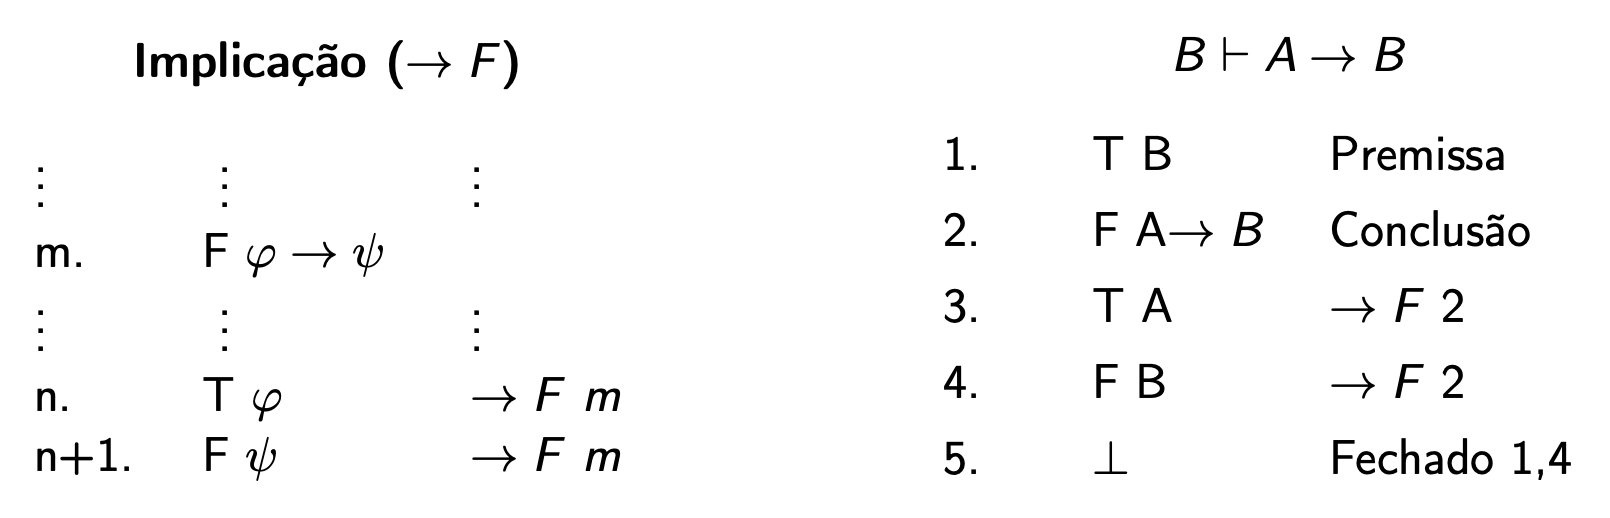

In [ ]:
#@title ANITA - Exemplo: $B\vdash A\rightarrow B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T B          pre
2. F A->B       conclusao
3. T A          ->F 2
4. F B          ->F 2
5. @            fechado 1,4''', height_layout='120px')

## Exercícios de Tableau Analítico

In [ ]:
#@title ANITA - Exercício 1
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(0,4)])


In [ ]:
#@title ANITA - Exercício 2
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(4,8)])

In [ ]:
#@title ANITA - Exercício 3
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(8,12)])

In [ ]:
#@title ANITA - Exercício 4
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(12,16)])

In [ ]:
#@title ANITA - Exercício 5
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(16,20)])

In [ ]:
#@title ANITA - Exercício 6
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(20,24)])

In [ ]:
#@title ANITA - Exercício 7
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(24,28)])

In [ ]:
#@title ANITA - Exercício 8
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(28,32)])

In [ ]:
#@title ANITA - Exercício 9
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(32,36)])

In [ ]:
#@title ANITA - Exercício 10
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(36,41)])

## Exercícios sobre Especificação e Tableau Analítico

In [ ]:
#@title Exercício 1: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q1()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$


In [ ]:
anita()

In [ ]:
#@title Exercício 2: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q2()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$


In [ ]:
anita()

In [ ]:
#@title Exercício 3: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q3()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$


In [ ]:
anita()

In [ ]:
#@title Exercício 4: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q4()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$


In [ ]:
anita()

In [ ]:
#@title Exercício 5: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q5()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$


In [ ]:
anita()

In [ ]:
#@title Exercício 6: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q6()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$


In [ ]:
anita()

In [ ]:
#@title Exercício 7: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.

verify_reasoning_q7()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$

In [ ]:
anita()

In [ ]:
#@title Exercício 8: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.

verify_reasoning_q8()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$

In [ ]:
anita()

In [ ]:
#@title Exercício 9: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.
verify_reasoning_q9()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$

In [ ]:
anita()

In [ ]:
#@title Exercício 10: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.

verify_reasoning_q10()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$

In [ ]:
anita()

In [ ]:
#@title Exercício 11: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.

verify_reasoning_q11()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$

In [ ]:
anita()

In [ ]:
#@title Exercício 12: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exercício.

verify_reasoning_q12()

**Exercício: Represente e demonstre, utilizando o sistema de Tableau Analítico, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere os seguintes átomos:
1. ...
1. ...
1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
1. ...
1. ...
1. ...
1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
$$...$$

In [ ]:
anita()

## Exercícios Contra-exemplo:

In [ ]:
#@title Exercício 1: $A\lor B, B\rightarrow C\vdash A\rightarrow C$
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('A|B, B->C |- A->C',input_proof='''# A|B, B->C |- A->C 
1. T A|B        pre
2. T B->C       pre
3. F A->C       conclusao
4. T A          ->F 3
5. F C          ->F 3
6. {  T A       |T 1
7.    { F B     ->T 2
      }
8.    { T C     ->T 2
9.      @       fechado 5,8
      }
   }
10.{  T B       |T 1
11.   { F B     ->T 2
12.     @       fechado 10,11
      }
13.    { T C     ->T 2
14.      @      fechado 5,13
      }
   }''')

In [ ]:
#@title Exercício 2: $A\rightarrow B, \lnot A \rightarrow B \land C, \lnot B\vdash C$
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('A->B, ~A->(B|C), B|- C', input_proof='''1. T A->B           pre
2. T ~A->(B|C)      pre
3. T B              pre
4. F C              conclusao
5. {  F A           ->T 1
6.    { F ~A        ->T 2
7.      T A         ~F 6
8.      @           fechado 5,7
      }
9.    {  T B|C      ->T 2
10.     { T B       |T 9
        }
11.     { T C       |T 9
12.       @         fechado 4, 11
        }
      }
  }
13.{  T B           ->T 1
   }''')

In [ ]:
#@title Exercício 3: $A\rightarrow B, B\rightarrow\lnot C \vdash A\rightarrow C$
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('A->B, B->~C|- A->C','''#{A→B,B→¬C}⊢A→C
1. T A->B           pre
2. T B->~C          pre
3. F A->C           conclusao
4. T A              ->F 3
5. F C              ->F 3
6. {  F A           ->T 1
7.    @             fechado 4,6
   }
8. {  T B           ->T 1
9.    {   F B       ->T 2
10.       @         fechado 8,9
      }
11.   {   T ~C      ->T 2
12.       F C       ~T 11
      }
    }''')

In [ ]:
#@title Exercício 4: $\lnot A\land B, \lnot A\land B\rightarrow C\lor\lnot A \vdash C\lor A$
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('~A&B, ~A&B->C|~A |- C|A', input_proof='''1. T ~A&B         pre
2. T ~A&B->C|~A   pre
3. F C|A          conclusao
4. F C            |F 3
5. F A            |F 3
6. {  F ~A&B      ->T 2
7.    @           fechado 1, 6
   }
8. {  T C|~A      ->T 2
9.    { T C       |T 8
10.     @         fechado 4,9
      }
11.   { T ~A      |T 8
12.     F A       ~T 11
13.     T ~A      &T 1
14.     T B       &T 1
15.     F A       ~T 13
      }
   }''')

In [ ]:
#@title Exercício 5: $A\rightarrow B, A, \lnot A \rightarrow C \vdash C $
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('A->B, A, ~A->C |- C', input_proof='''# {A→B,A,¬A→C,}⊨C
1. T A->B       pre
2. T A          pre
3. T ~A->C      pre 
4. F C          conclusao
5. {  F A       ->T 1
6.    @         fechado 2,5
   }
7. {  T B       ->T 1
8.    { F ~A    ->T 3
9.      T A     ~F 8
      }
10.   { T C     ->T 3
11.     @       fechado 4,10
      }
   }''')      

In [ ]:
#@title Exercício 6: $\lnot A \rightarrow\lnot B, B, A\rightarrow\lnot C \vdash C$
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('~A->~B, B, A->~C |- C', input_proof='''1. T ~A->~B           pre
2. T B                pre
3. T A->~C            pre
4. F C                conclusao
5. {  F ~A            ->T 1
6.    T A             ~F 5
7.    {   F A         ->T 3
8.        @           fechado 6,7
      }
9.    {   T ~C        ->T 3
10.       F C         ~T 9
      }
   }
11.{  T ~B            ->T 1
12.   F B             ~T 11
13.   @               fechado 2,12
   }''')

In [ ]:
#@title Exercício 7: $ A\rightarrow B, \lnot A \rightarrow D, B\rightarrow C, \lnot C \vdash\lnot D$
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem('A->B, ~A->D, B->C, ~C |- ~D', input_proof='''1. T A->B             pre
2. T ~A->D            pre
3. T B->C             pre
4. T ~C               pre
5. F ~D               conclusao
6. F C                ~T 4
7. T D                ~F 5
8. {  F B             ->T 3
9.    {   F A         ->T 1
10.       {   F ~A    ->T 2
11.           T A     ~F 10
12.           @       fechado 9,11
          }
13.       {   T D     ->T 2
          }
      }
14.   {   T B         ->T 1
15.       @           fechado 8, 14
      }
   }
16.{  T C             ->T 3
17.   @               fechado 6, 16
   }''')

<!--NAVIGATION-->
< [Dedução Natural da Lógica Proposicional no Estilo Gentzen](./Cap%C3%ADtulo%2006.2%20-%20Dedu%C3%A7%C3%A3o%20Natural%20da%20L%C3%B3gica%20Proposicional%20no%20Estilo%20de%20Gentzen.ipynb) | [Índice](./Index.ipynb) | [A Linguagem da Lógica de Primeira-Ordem](./Cap%C3%ADtulo%2008%20-%20A%20Linguagem%20da%20L%C3%B3gica%20de%20Primeira-Ordem.ipynb) >